# **Credit Card Fraud Detection**

## Introduction
Credit card fraud is a growing threat in the digital economy, leading to significant financial losses. This project leverages machine learning to detect fraudulent transactions by identifying anomalies in transaction data. We utilize ensemble models such as Random Forest, Gradient Boosting, and XGBoost to build a robust detection system. The goal is to accurately distinguish between legitimate and fraudulent activities, minimizing false positives and enhancing the security of digital transactions.

#### Dataset link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## About the data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.shape

(284807, 31)

In [8]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [10]:
# explore amount of No-fraud transaction
NoFraud=data[data["Class"]==0]
NoFraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# explore amount of Fraud transaction
Fraud=data[data["Class"]==1]
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


##### 
**Note:** The original dataset is significantly imbalanced, with the majority of transactions being non-fraudulent. If we use this data as the foundation for our predictive models, there's a risk that the models may make errors and overfit by "assuming" that most transactions are not fraudulent. However, our objective is not for the model to assume but to accurately identify patterns that indicate fraud.

## Exploratory Data Analysis

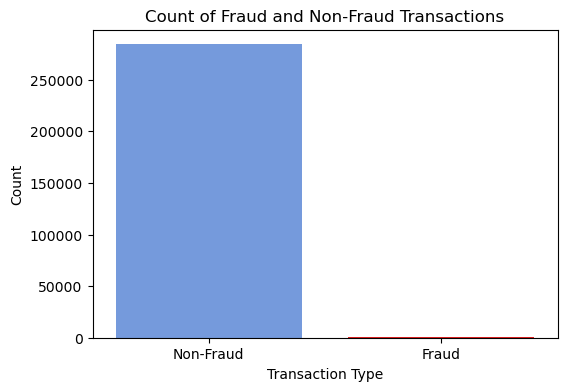

In [13]:
# distribution of Non-Fraud and Fraud Transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette={0: 'cornflowerblue', 1: 'red'})
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Fraud and Non-Fraud Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

##### 
we can observe, this dataset is severely imbalanced (most of the transactions are non-fraud). To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques.

Text(0.5, 1.0, 'Distribution of Transaction Amount')

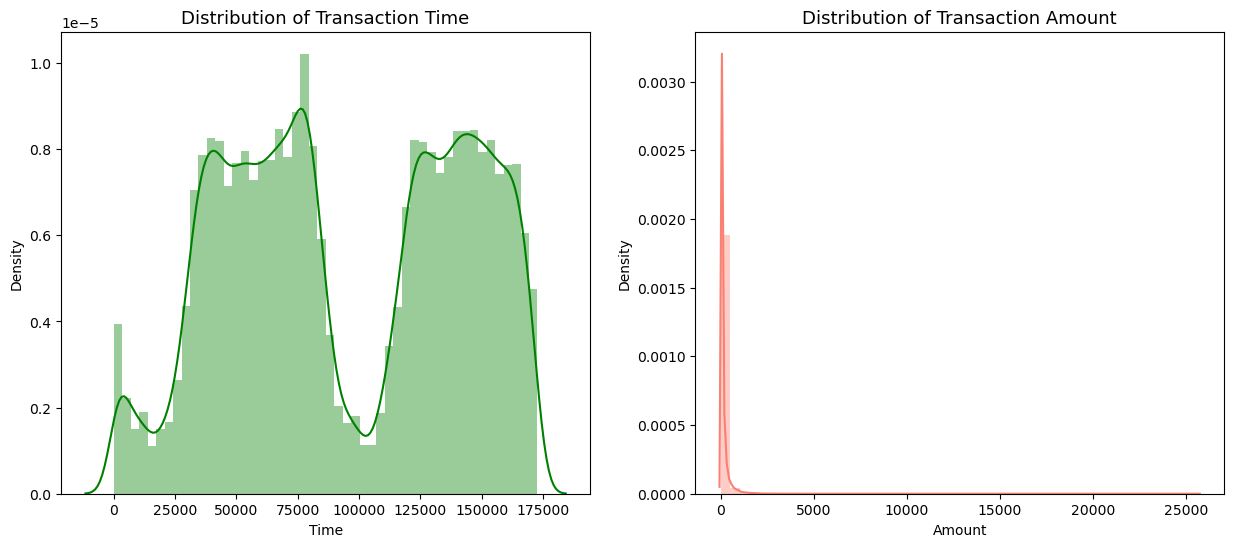

In [14]:
# distributions of transaction time and transaction amount
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(data['Time'], ax=ax1, color='g')
ax2 = sns.distplot(data['Amount'], ax=ax2, color='salmon')
ax1.set_title('Distribution of Transaction Time', fontsize=13)
ax2.set_title('Distribution of Transaction Amount', fontsize=13)

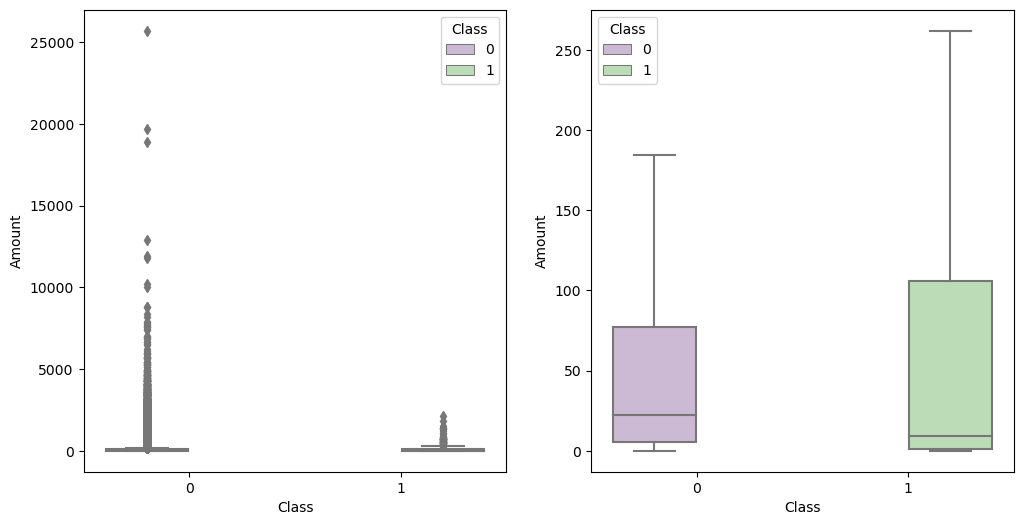

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show()

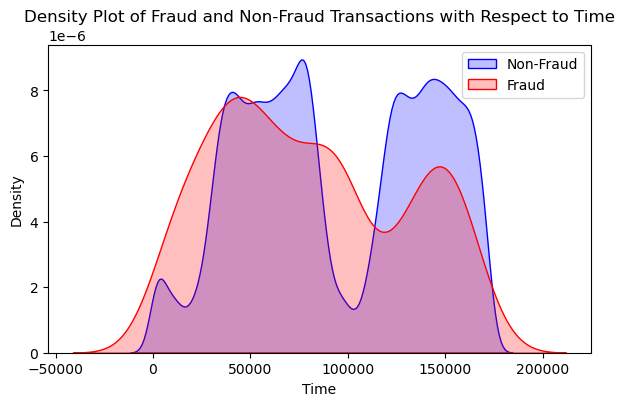

In [16]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=data[data['Class'] == 0], x='Time', label='Non-Fraud', color='blue', fill=True)
sns.kdeplot(data=data[data['Class'] == 1], x='Time', label='Fraud', color='red', fill=True)
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Density Plot of Fraud and Non-Fraud Transactions with Respect to Time')
plt.legend()
plt.show()

##### 
Fraudulent transactions have a distribution more even than valid transactions.

##### 
To explore fraud and non-fraudulent transactions throughout the day,creates a new column Hour in the DataFrame by converting the Time feature from seconds to hours.then calculates several statistics for the Amount feature.

In [17]:
data1=data.copy()
data1['Hour'] = data1['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data1.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
data1 = pd.DataFrame(tmp)
data1.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
data1.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


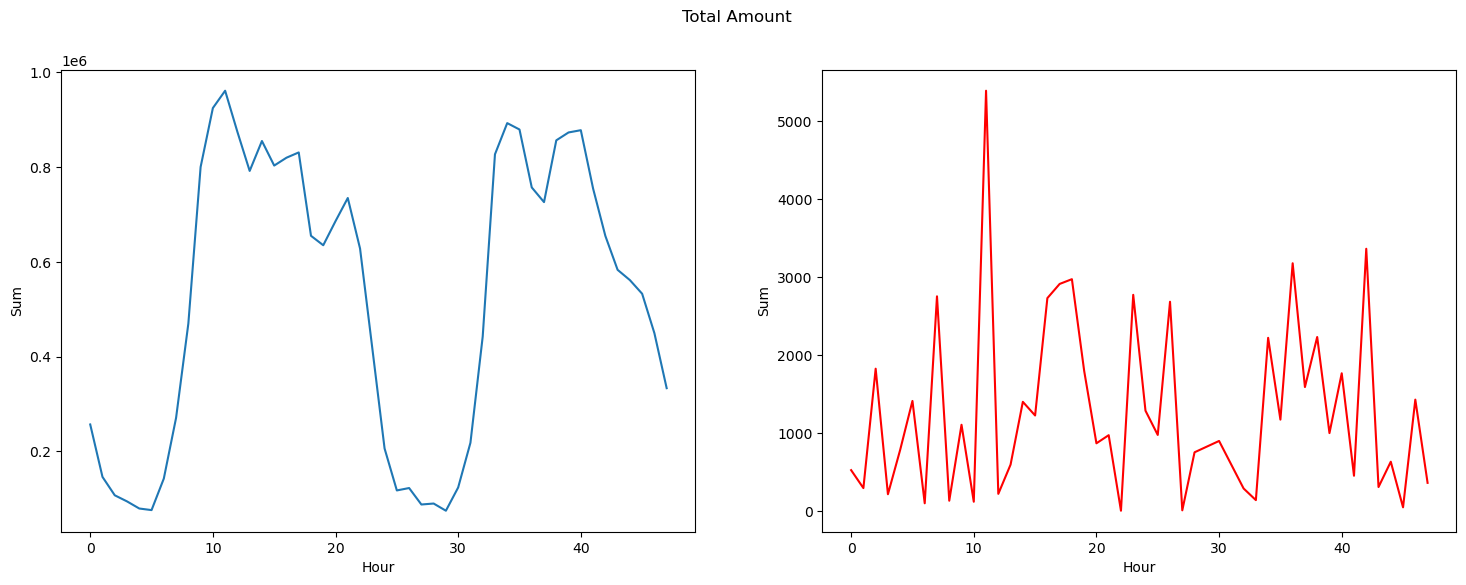

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=data1.loc[data1.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=data1.loc[data1.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

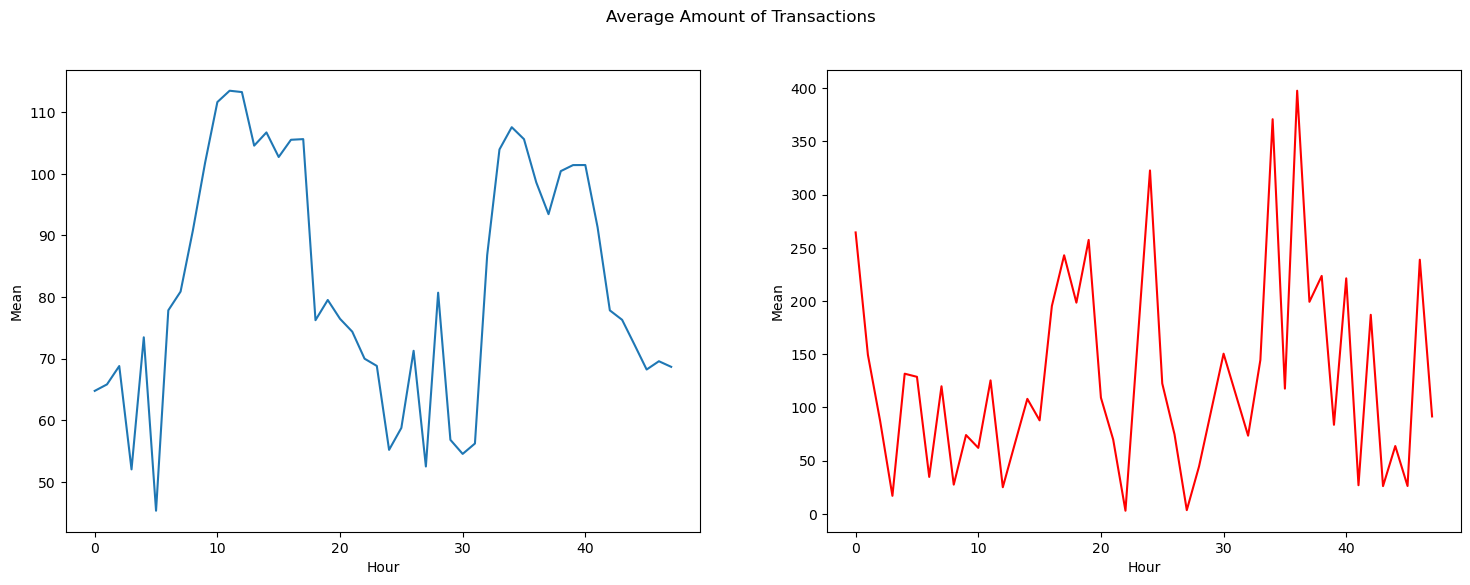

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=data1.loc[data1.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=data1.loc[data1.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

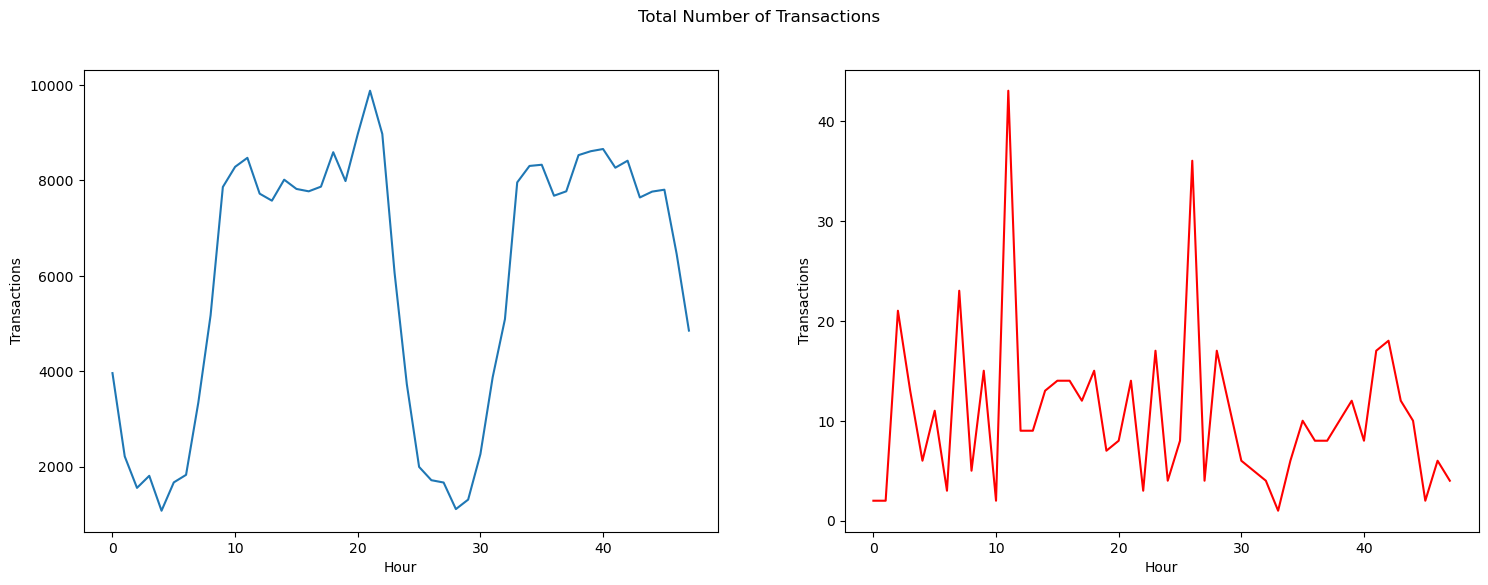

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=data1.loc[data1.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=data1.loc[data1.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

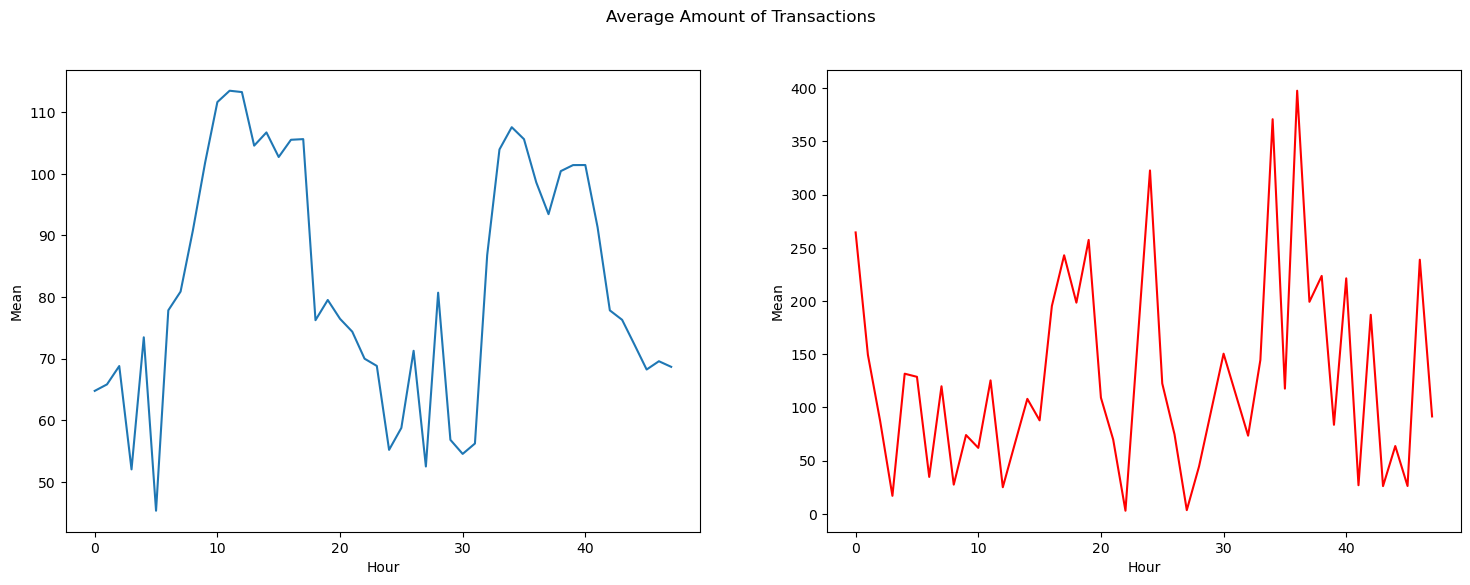

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=data1.loc[data1.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=data1.loc[data1.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

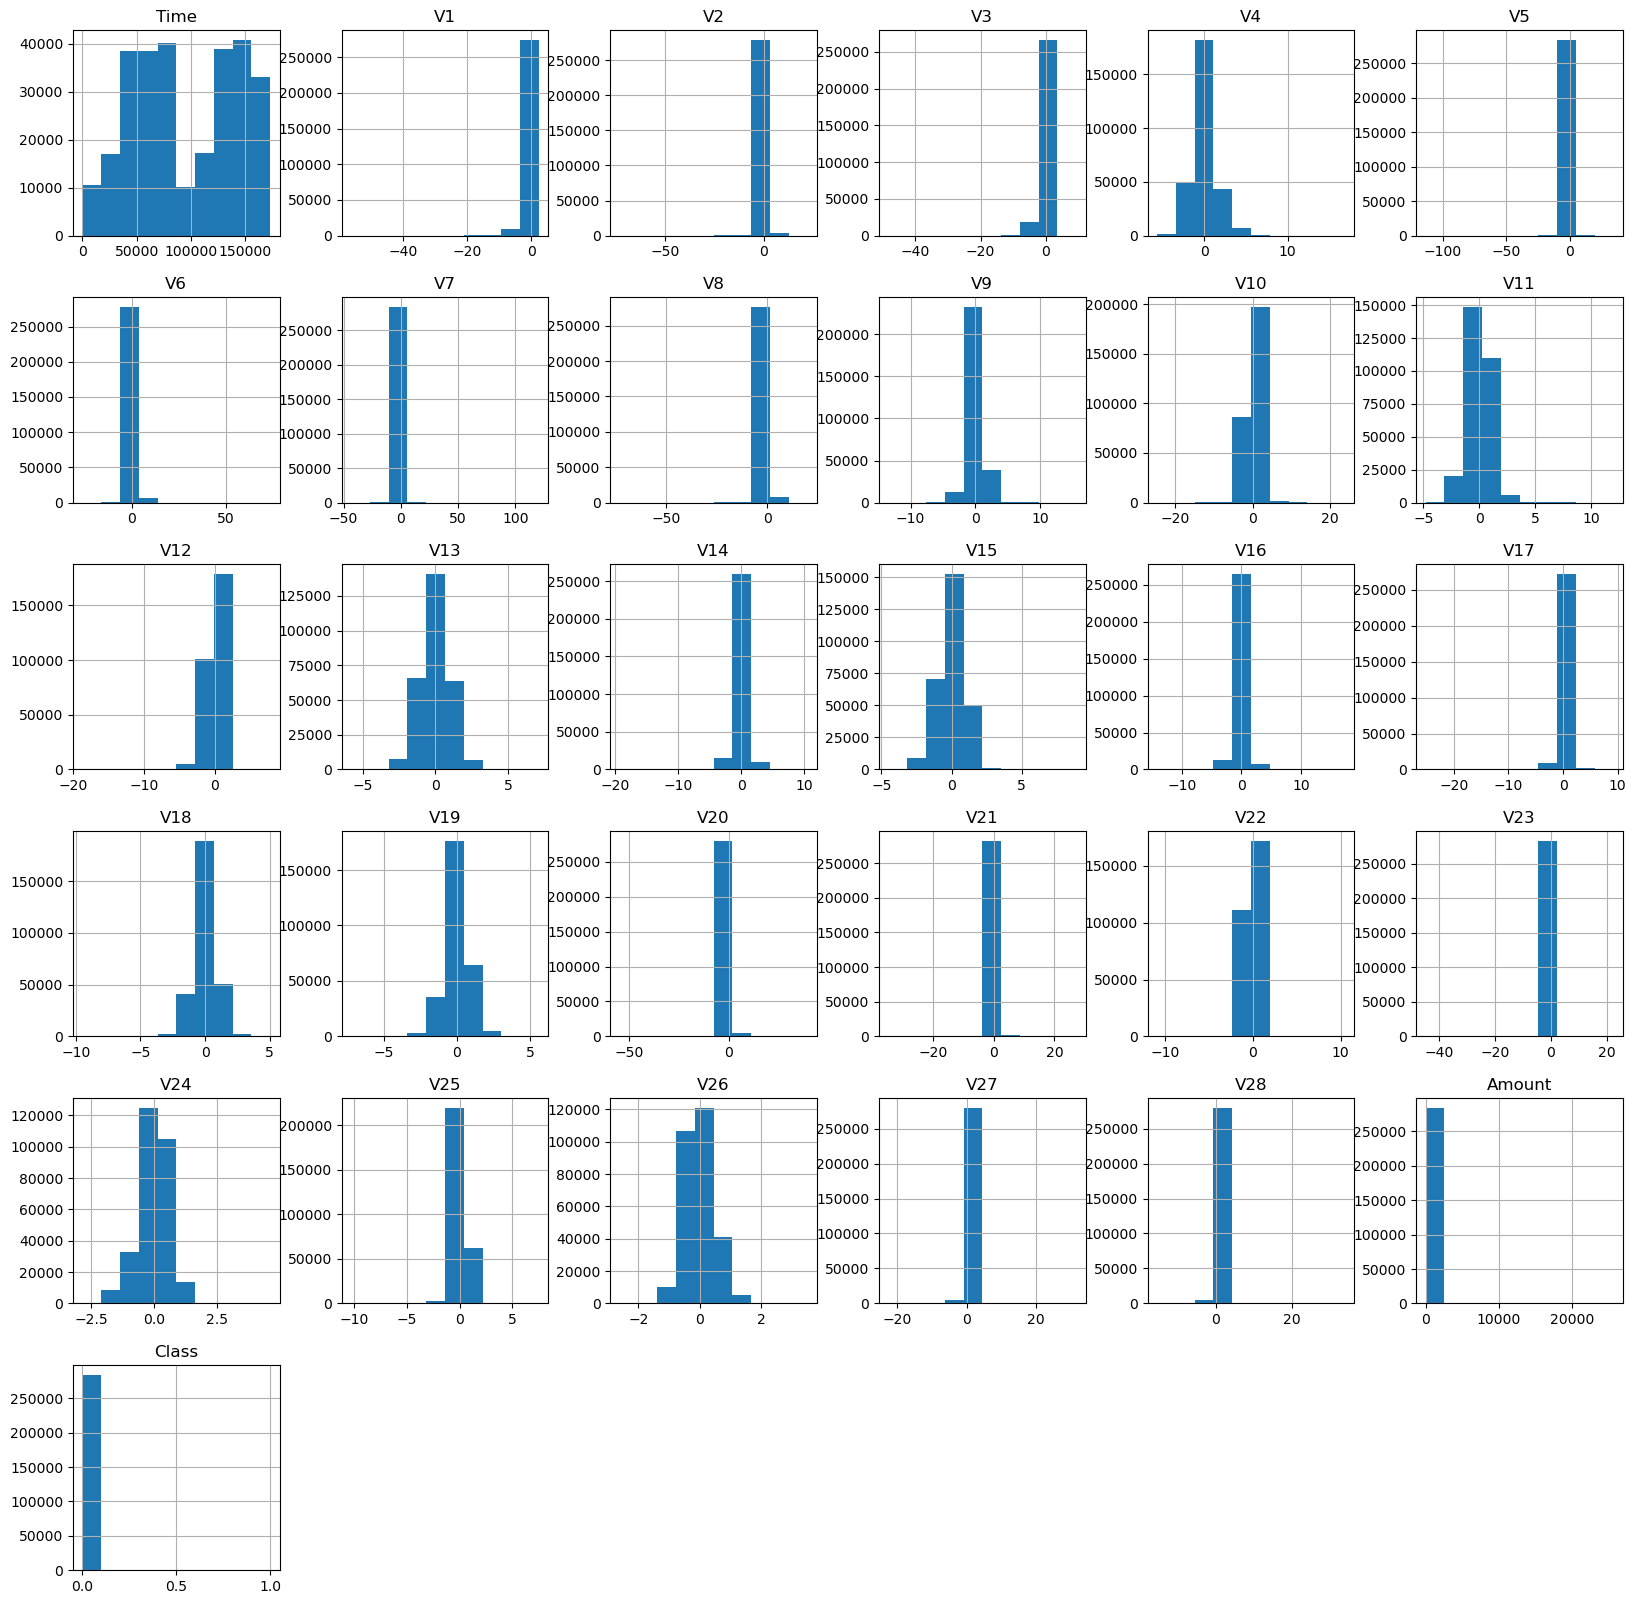

In [22]:
data.hist(figsize=(20,20))
plt.show()

<Axes: >

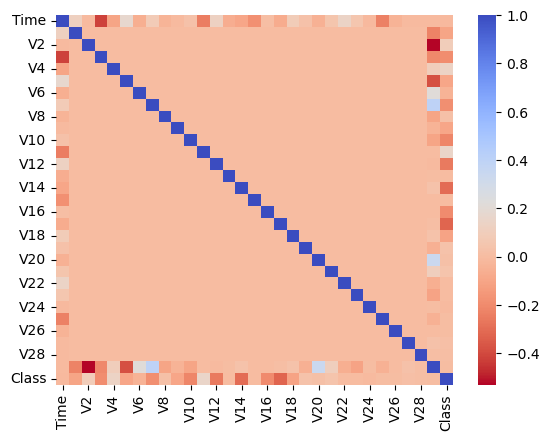

In [23]:
# correlation matrix
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

## Scaling
We need to scale columns comprise of Time and Amount.In our case it is better to use the Robust Scaler algorithm because it's robust to outliers.

In [24]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [25]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


##### 
This dataset is severely imbalanced (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use :
* **Under-sampling**
* **Over-Sampling**

##  Random Under-Sampling
In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
* The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
* Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
* After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

In [26]:
df = data.copy()
df = df.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df= df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
103545,0.339831,-0.187819,0.985552,0.240861,0.300365,2.452071,0.289716,0.723877,0.055764,0.302285,...,-0.207615,0.069279,0.180752,-0.085097,-0.291163,0.497659,0.128304,-0.006066,0.001070,0
48094,0.040523,-0.484005,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,...,0.817203,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,1
225031,-0.097813,0.697612,-0.596710,-0.302692,0.972853,-3.252168,-0.028393,-0.070821,-0.041567,0.080437,...,-0.211571,-0.268863,-0.381179,-0.411388,-0.025107,0.845673,-0.087945,0.248097,0.103923,0
94218,9.758681,-0.233873,-8.744415,-3.420468,-4.850575,6.606846,-2.800546,0.105512,-3.269801,0.940378,...,-1.818315,0.102913,0.311626,-4.129195,0.034639,-1.133631,0.272265,1.841307,-1.796363,1
151807,0.161951,0.136268,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,...,3.792667,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,1


##### 
we can check whether our dataframe correctly balanced or not.

In [27]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

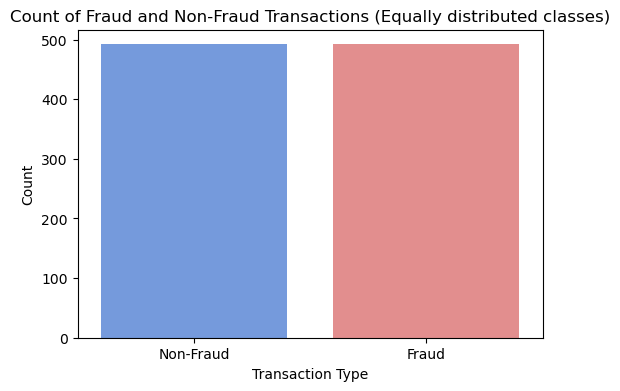

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_df, palette={0: 'cornflowerblue', 1: 'lightcoral'})
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Fraud and Non-Fraud Transactions (Equally distributed classes)')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

## Model building

In [29]:
X=new_df.drop(columns='Class',axis=1)
y=new_df['Class']

In [30]:
X.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
103545,0.339831,-0.187819,0.985552,0.240861,0.300365,2.452071,0.289716,0.723877,0.055764,0.302285,...,-1.150303,-0.207615,0.069279,0.180752,-0.085097,-0.291163,0.497659,0.128304,-0.006066,0.001070
48094,0.040523,-0.484005,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,...,2.109053,0.817203,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843
225031,-0.097813,0.697612,-0.596710,-0.302692,0.972853,-3.252168,-0.028393,-0.070821,-0.041567,0.080437,...,-0.495279,-0.211571,-0.268863,-0.381179,-0.411388,-0.025107,0.845673,-0.087945,0.248097,0.103923
94218,9.758681,-0.233873,-8.744415,-3.420468,-4.850575,6.606846,-2.800546,0.105512,-3.269801,0.940378,...,1.332930,-1.818315,0.102913,0.311626,-4.129195,0.034639,-1.133631,0.272265,1.841307,-1.796363
151807,0.161951,0.136268,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,...,0.148592,3.792667,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741


In [31]:
y.head()

103545    0
48094     1
225031    0
94218     1
151807    1
Name: Class, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(n_estimators=10, random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
}

#### Accuracy and Classification report

In [34]:
def evaluate_classifiers(X_train, y_train, X_test, y_test, classifiers):
    results = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy and classification report
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            'accuracy': accuracy,
            'classification_report': report
        }
        
        print(f"\n{name} Accuracy: {accuracy:.4f}\n")
        print(classification_report(y_test, y_pred))
        print("-----------------------------------------------------")
    
    return results

results = evaluate_classifiers(X_train, y_train, X_test, y_test, classifiers)



LogisticRegression Accuracy: 0.9239

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.93      0.92      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

-----------------------------------------------------

Support Vector Classifier Accuracy: 0.9086

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        99
           1       0.93      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

-----------------------------------------------------

DecisionTreeClassifier Accuracy: 0.8731

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        99
    

#### Plot Confusion Matrix

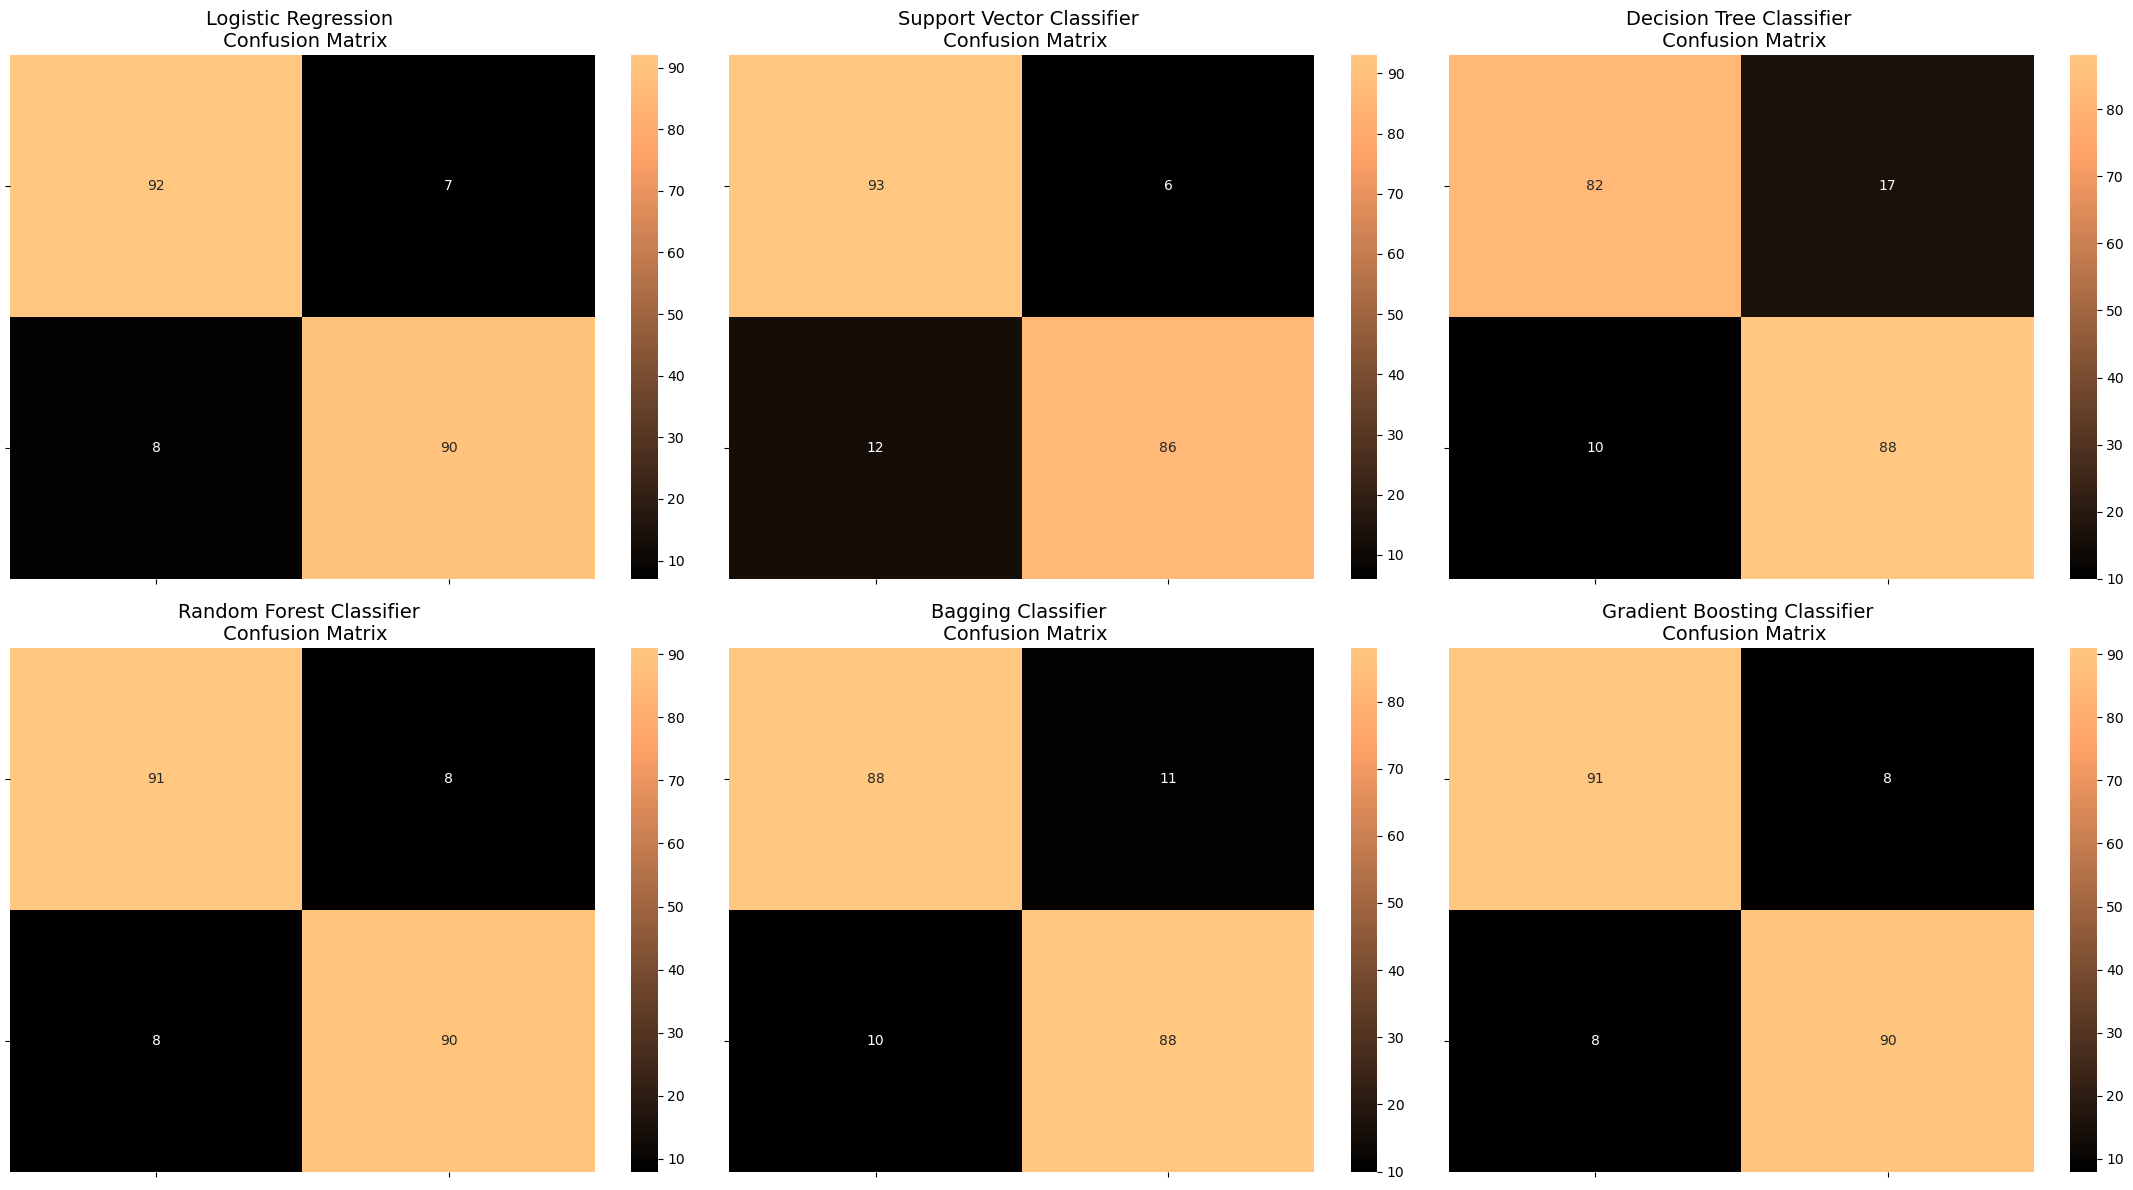

In [35]:
# Initialize classifiers
log_reg = LogisticRegression()
svc = SVC(probability=True)  # Ensure you have probability=True for ROC
tree_clf = DecisionTreeClassifier()
rf = RandomForestClassifier()
bag = BaggingClassifier(n_estimators=10, random_state=0)
gb = GradientBoostingClassifier()

# Fit classifiers
log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
rf.fit(X_train, y_train)
bag.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Generate predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_bag = bag.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Compute confusion matrices
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
rf_cf = confusion_matrix(y_test, y_pred_rf)
bag_cf = confusion_matrix(y_test, y_pred_bag)
gb_cf = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrices
fig, ax = plt.subplots(2, 3, figsize=(22, 12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper, fmt='g')
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=12, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=12, rotation=360)

sns.heatmap(svc_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper, fmt='g')
ax[0, 1].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)
ax[0, 1].set_xticklabels(['', ''], fontsize=12, rotation=90)
ax[0, 1].set_yticklabels(['', ''], fontsize=12, rotation=360)

sns.heatmap(tree_cf, ax=ax[0][2], annot=True, cmap=plt.cm.copper, fmt='g')
ax[0, 2].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[0, 2].set_xticklabels(['', ''], fontsize=12, rotation=90)
ax[0, 2].set_yticklabels(['', ''], fontsize=12, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper, fmt='g')
ax[1, 0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=12, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=12, rotation=360)

sns.heatmap(bag_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper, fmt='g')
ax[1, 1].set_title("Bagging Classifier \n Confusion Matrix", fontsize=14)
ax[1, 1].set_xticklabels(['', ''], fontsize=12, rotation=90)
ax[1, 1].set_yticklabels(['', ''], fontsize=12, rotation=360)

sns.heatmap(gb_cf, ax=ax[1][2], annot=True, cmap=plt.cm.copper, fmt='g')
ax[1, 2].set_title("Gradient Boosting Classifier \n Confusion Matrix", fontsize=14)
ax[1, 2].set_xticklabels(['', ''], fontsize=12, rotation=90)
ax[1, 2].set_yticklabels(['', ''], fontsize=12, rotation=360)

plt.tight_layout()
plt.show()

#### ROC Curve

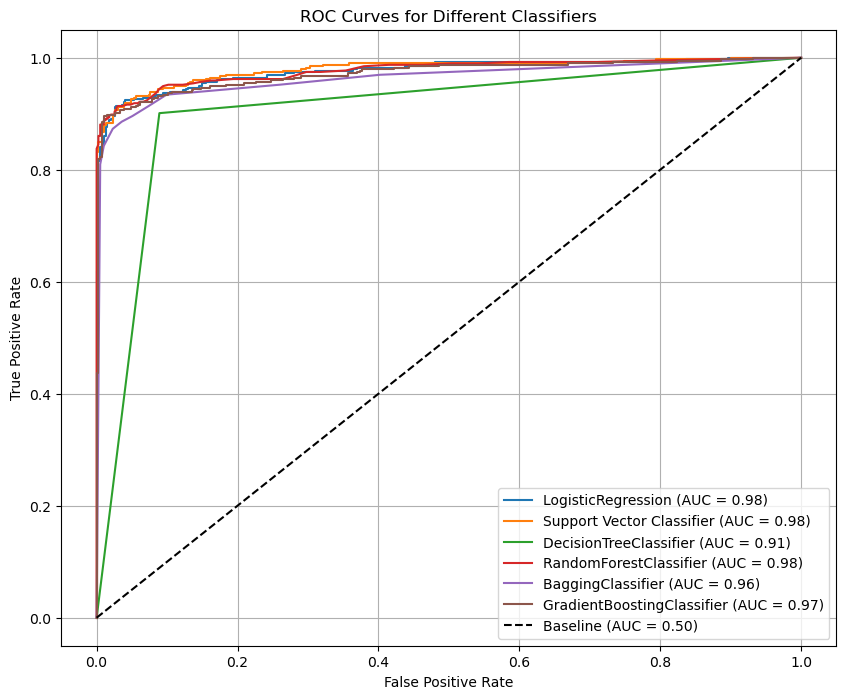

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    # Perform cross-validation and get the prediction probabilities
    if hasattr(clf, "decision_function"):
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="decision_function")
    else:
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="predict_proba")[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    roc_auc = roc_auc_score(y_train, y_scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the baseline
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.50)')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='best')
plt.grid()

plt.show()

##### Classifier Performance:
1. Logistic Regression (AUC = 0.98):

Interpretation: Logistic Regression has an excellent AUC value of 0.98. This indicates that the model performs very well at distinguishing between fraudulent and non-fraudulent transactions, with very high accuracy in ranking predictions.

2. Support Vector Classifier (AUC = 0.99):

Interpretation: The Support Vector Classifier has the highest AUC at 0.99, suggesting it is the best among your models at distinguishing between the two classes. It has an excellent capability to correctly classify both fraudulent and non-fraudulent transactions.

3. Decision Tree Classifier (AUC = 0.91):

Interpretation: The Decision Tree Classifier has a lower AUC of 0.91 compared to others. While still good, it is less effective at ranking predictions compared to the other classifiers, and may be prone to overfitting due to its complexity.

4. Random Forest Classifier (AUC = 0.98):

Interpretation: The Random Forest Classifier performs similarly to Logistic Regression with an AUC of 0.98. It is very effective at classifying transactions and benefits from ensemble learning, which helps mitigate overfitting.

5. Bagging Classifier (AUC = 0.97):

Interpretation: The Bagging Classifier also performs very well with an AUC of 0.97. It is slightly less effective than the top performers but still provides strong classification performance.

6. Gradient Boosting Classifier (AUC = 0.98):

Interpretation: The Gradient Boosting Classifier performs similarly to Logistic Regression and Random Forest with an AUC of 0.98. It is effective at handling complex patterns and interactions in the data.

## Interpretation

#### **1. Accuracy Score:**
- **Logistic Regression**: 95.43%
- **Support Vector Classifier**: 94.42%
- **Decision Tree Classifier**: 90.36%
- **Random Forest Classifier**: 95.94%
- **Bagging Classifier**: 95.94%
- **Gradient Boosting Classifier**: 95.43%

The accuracy scores of the classifiers indicate that all models perform well in terms of overall classification accuracy. The Random Forest and Bagging Classifiers achieve the highest accuracy at 95.94%, suggesting they are slightly more effective in correctly classifying both fraudulent and non-fraudulent transactions compared to other models. The Decision Tree Classifier, while still performing well, shows a lower accuracy (90.36%), which may indicate it is less effective at handling the imbalanced nature of the dataset.

#### **2. Classification Report:**
- **Logistic Regression**: Shows balanced precision, recall, and F1-score, particularly strong in detecting fraudulent transactions.
- **Support Vector Classifier**: Exhibits high precision and recall for both classes, indicating strong overall performance.
- **Decision Tree Classifier**: Demonstrates good precision and recall but slightly less balanced compared to others, with a trade-off between false positives and false negatives.
- **Random Forest Classifier**: Provides high precision and recall, with balanced performance across both classes, effectively managing the class imbalance.
- **Bagging Classifier**: Similar to Random Forest, it shows high precision and recall, performing robustly across the classes.
- **Gradient Boosting Classifier**: Exhibits strong performance metrics, comparable to Logistic Regression and Random Forest.

The classification reports highlight that most classifiers are effective at distinguishing fraudulent transactions from non-fraudulent ones. The Random Forest and Bagging Classifiers stand out for their high precision and recall, indicating they are well-suited for minimizing both false positives and false negatives. The Decision Tree Classifier shows a slight trade-off between precision and recall, suggesting potential areas for improvement in handling the imbalanced data.

#### **3. ROC Curve and AUC Values:**
- **Logistic Regression (AUC = 0.98)**
- **Support Vector Classifier (AUC = 0.99)**
- **Decision Tree Classifier (AUC = 0.91)**
- **Random Forest Classifier (AUC = 0.98)**
- **Bagging Classifier (AUC = 0.97)**
- **Gradient Boosting Classifier (AUC = 0.98)**

The AUC values provide insights into the classifiers' ability to distinguish between fraudulent and non-fraudulent transactions. The Support Vector Classifier achieves the highest AUC of 0.99, indicating superior performance in ranking predictions and distinguishing between classes. Other classifiers, such as Logistic Regression, Random Forest, and Gradient Boosting, also demonstrate excellent performance with AUC values around 0.98. The Decision Tree Classifier, with an AUC of 0.91, shows relatively lower performance in distinguishing between the classes compared to the other models.

**Support Vector Classifier stands out as the best performer, particularly in terms of AUC, while the Random Forest and Bagging Classifiers also show robust performance across various metrics.** 